<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Progressive-Resizing-+-MixUp" data-toc-modified-id="Progressive-Resizing-+-MixUp-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Progressive Resizing + MixUp</a></span><ul class="toc-item"><li><span><a href="#batch_size:-128,-image_size:-128" data-toc-modified-id="batch_size:-128,-image_size:-128-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>batch_size: 128, image_size: 128</a></span></li><li><span><a href="#batch_size:-64,-image_size:-256" data-toc-modified-id="batch_size:-64,-image_size:-256-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>batch_size: 64, image_size: 256</a></span></li><li><span><a href="#batch_size:-24,-image_size:-512" data-toc-modified-id="batch_size:-24,-image_size:-512-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>batch_size: 24, image_size: 512</a></span></li></ul></li><li><span><a href="#Test-Time-Augmentation" data-toc-modified-id="Test-Time-Augmentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test Time Augmentation</a></span><ul class="toc-item"><li><span><a href="#number-of-variations-:-4,-method:-average" data-toc-modified-id="number-of-variations-:-4,-method:-average-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>number of variations : 4, method: average</a></span></li><li><span><a href="#number-of-variations-:-8,-method:-average" data-toc-modified-id="number-of-variations-:-8,-method:-average-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>number of variations : 8, method: average</a></span></li><li><span><a href="#number-of-variations-:-4,-method:-max" data-toc-modified-id="number-of-variations-:-4,-method:-max-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>number of variations : 4, method: max</a></span></li></ul></li></ul></div>

In [2]:
from fastai2.vision.all import *

In [4]:
path = Path('/content/drive/My Drive/Food-101/dataset')
Path.BASE_PATH = path
path.ls()

(#2) [Path('train'),Path('valid')]

In [5]:
files = get_image_files(path)
len(files)

101000

In [6]:
def get_dls(batch_size, img_size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       splitter=GrandparentSplitter(),
                       item_tfms=Resize(460),
                       batch_tfms=aug_transforms(size=img_size, min_scale=0.75))
    return dblock.dataloaders(path, bs=batch_size)

# Progressive Resizing + MixUp

## batch_size: 128, image_size: 128

In [7]:
dls = get_dls(128, 128)
learn = cnn_learner(dls, resnet50, metrics=accuracy, cbs=MixUp)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


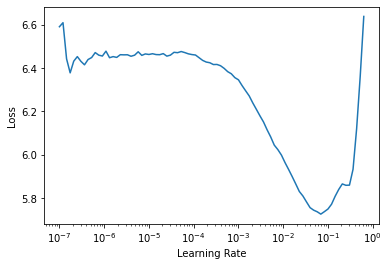

In [8]:
lr_min, lr_steep = learn.lr_find()

In [9]:
learn.fit_one_cycle(4, 3e-3)
learn.save('resnet50-mixup-128')

epoch,train_loss,valid_loss,accuracy,time
0,3.161827,1.842648,0.523089,3:20:07
1,2.772474,1.525861,0.606574,09:26
2,2.522442,1.290076,0.671129,09:04
3,2.443406,1.224257,0.689545,09:03


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


## batch_size: 64, image_size: 256

In [10]:
learn.dls = get_dls(64, 256)
learn.fine_tune(12, 3e-3)
learn.save('resnet50-mixup-256')

epoch,train_loss,valid_loss,accuracy,time
0,2.399753,1.042219,0.729267,09:58


epoch,train_loss,valid_loss,accuracy,time
0,2.196942,0.865251,0.778099,11:05
1,2.140969,0.870928,0.770139,11:04
2,2.114249,0.889306,0.766653,11:03
3,2.046470,0.827810,0.783644,11:02
4,1.975253,0.711419,0.810020,11:03
5,1.894643,0.668076,0.822020,11:05
6,1.795923,0.575390,0.848079,11:04
7,1.675972,0.533113,0.860990,11:06
8,1.600568,0.500048,0.868990,11:04
9,1.595252,0.471354,0.874812,11:04


## batch_size: 24, image_size: 512

In [11]:
learn.dls = get_dls(24, 512)
learn.fine_tune(16, 3e-4)
learn.save('resnet50-mixup-512')

epoch,train_loss,valid_loss,accuracy,time
0,1.780378,0.549236,0.854812,28:08


epoch,train_loss,valid_loss,accuracy,time
0,1.662495,0.484839,0.869822,36:00
1,1.667889,0.464413,0.874535,36:01
2,1.688542,0.448004,0.881347,36:00
3,1.621470,0.441932,0.882614,35:58
4,1.546490,0.430627,0.885347,35:57
5,1.555411,0.427514,0.883960,35:56
6,1.534615,0.415581,0.889426,35:58
7,1.581146,0.409321,0.890931,35:57
8,1.531401,0.406165,0.891168,35:56
9,1.477914,0.401086,0.893822,35:56


# Test Time Augmentation

## number of variations : 4, method: average

In [12]:
preds, targets = learn.tta()
accuracy(preds, targets).item()

0.9032475352287292

## number of variations : 8, method: average

In [13]:
preds, targets = learn.tta(n=8)
accuracy(preds, targets).item()

0.9036039710044861

## number of variations : 4, method: max

In [15]:
preds, targets = learn.tta(use_max=True)
accuracy(preds, targets).item()

0.8977822065353394